In [1]:
'''
    Modified Genetic Algorithm for 1 dim array genes
    1 point Crossover
    #########
    5 Parents from previous 100 genes      ... A
    10 Possible combinations,
    9 children for each comb.
    Crossover, 90 children from parents    ... B
    5 totally random gene                  ... C
    A + B + C = 100 genes for Total (consist one generation)
    #########
    Terms Define
    parents: top genes from previous generation
    child(ren): genes from crossover + slight mutation
                a.k.a. partly mutated
    mutant(s): newly made genes by random
               a.k.a. full(ly) mutated
'''
import numpy as np
from itertools import combinations


class Crossover:
    def __init__(self, child_npp=9, mutant_n=5, m_rate=0.2):
        # total output = parents, mutants, children w/ slight mutation
        self.child_n = child_npp
        # children num per a parents' combination
        self.mutant_n = mutant_n
        # mutation num
        self.m_rate = m_rate
        # mutation_rate of children
        self.min = -100
        self.max = 101
        # random range
        # [min, max)
        # self.size = len(self.parent[0])
        # size(length) of a gene
        # self.mutant_size = (mutant_n, self.size)
        # size of mutant array

    def setParent(self, parents):
        self.parent = parents
        self.size = len(self.parent[0])
        self.mutant_size = (self.mutant_n, self.size)

    def crossover(self, A, B):
        # crossover: create child from parents
        k = np.random.randint(1, self.size)
        # division point
        # [1, size) = (0, size)
        if np.random.rand() > 0.5:
            child_genes = (A[:k], B[k:])
            # A + B
        else:
            child_genes = (B[:k], A[k:])
            # B + A

        return np.hstack(child_genes)

    def mutation(self, child):
        # replace some genes with whole new random genes
        mutated = np.random.random(child.shape) < self.m_rate
        # select 'some genes'
        size = child[mutated].shape

        if mutated.any():
            # execute only when mutation is needed
            child[mutated] = np.random.randint(self.min, self.max, size=size)
            # replace them with random genes

        return child

    def one_gen(self):
        pairs = list(combinations(self.parent, 2))
        # Combinations of parents for crossover
        child = list()
        # children initialize

        for pair in pairs:
            # each pair of parents
            for i in range(self.child_n):
                # create self.child_n children
                child.append(self.crossover(pair[0], pair[1]))

        child = self.mutation(np.array(child))
        # children w/ slight mutation
        mutant = np.random.randint(self.min, self.max, size=self.mutant_size)
        # mutants

        return np.vstack((self.parent, mutant, child))
        # total output = parents, mutants, children w/ slight mutation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
c = Crossover()

%matplotlib inline
data_n = 100

In [3]:
a, b = np.random.randint(-5, 6, 2)

In [4]:
def f(x, a=a, b=b):
    # f(x) = ax + b
    return a * x + b

In [5]:
def mse(a, b):
    # Mean Square Error
    res = 0
    for i in range(data_n):
        res += (y[i] - f(x[i], a, b)) ** 2
    return res

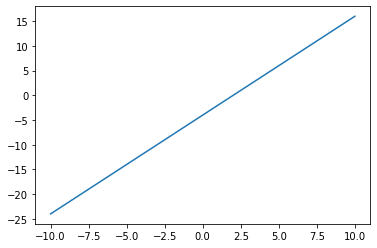

In [6]:
plt.plot([-10, 10], [f(-10), f(10)])
# plot y = ax + b at [-10, 10]
plt.show()

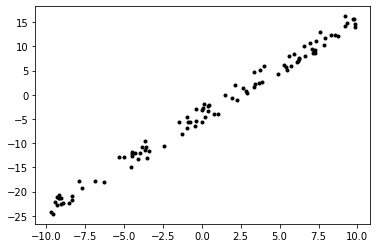

In [7]:
x = np.random.random(data_n) * 20 - 10
# random x, [-10, 10]
y = [(f(i) + np.random.random() * 4 - 2) for i in x]
# f(x) with noise(randomness)
plt.plot(x, y, 'k.')
plt.show()

In [8]:
parents = [np.random.randint(-10, 11, 2) for i in range(100)]
# initialize parents
fit = [mse(gene[0], gene[1]) for gene in parents]
# fitness(mse) of each parents

for step in range(1000):
    c.setParent([parents[i] for i in np.argpartition(fit, 5)[:5]])
    # top 5 parents
    parents = c.one_gen()
    fit = [mse(gene[0], gene[1]) for gene in parents]
res = np.argpartition(fit, 1)[:1]
# index of top 1 parent
final = parents[res][0]

2 -4
[ 2 -4]


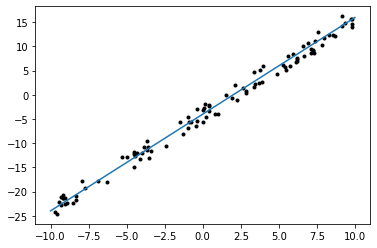

In [9]:
print(a, b)
print(final)
plt.plot(x, y, 'k.')
plt.plot([-10, 10], [f(-10, final[0], final[1]), f(10, final[0], final[1])])
plt.show()